# <font color='#000000'>Super Mart Case Study<font><a class='anchor' id='top'></a>

## <font color='289C4E'>Developing an Analytical Case Study<font><a class='anchor' id='top'></a>

### Table of Contents
    
* [1. Business Objective understanding and High-level Approach](#chapter1)

* [2. Data Health Review](#chapter2)
	* [2.1 Importing Libraries](#chapter2.1)
	* [2.2 Variable and Description](#chapter2.2)
	* [2.3 Importing the Data](#chapter2.3)
	* [2.4 Data Cleaning and Preprocessing](#chapter2.4)
	* [2.5 Data Statistical Summary](#chapter2.5)

* [3. Exploratory Data Analysis](#chapter3)
	* [3.1 Data Frequency Understanding](#chapter3.1)
	* [3.2 Univariate Analysis](#chapter3.2)
		* [3.2.1 Categorical Column](#chapter3.2.1)
		* [3.2.2 Numerical Column](#chapter3.2.2)
	* [3.3 Bivariate Analysis](#chapter3.3)
	* [3.4 Pearson correlation coefficient](#chapter3.4)

* [4. KPI/ Metric based questions](#chapter4)

* [5. Open-Ended Questions and Recommendations](#chapter5)
	* [5.1 Set A](#chapter5.1)
	* [5.2 Set B](#chapter5.2)

* [6. Business Objectives and its Approach](#chapter6)

## 1. Business Objective understanding and High-level Approach <a class="anchor" id="chapter1"></a>

**Business Objective**

To analyze and address the operational inefficiencies in the client's supply chain management system in order to optimize processes, reduce costs, and improve overall efficiency.

**High- Level Approach**

By conducting exploratory data analysis (EDA), variate analysis, and correlation analysis, we aim to address specific business questions and define clear objectives for the data analysis project.

## 2. Data Health Review <a class="anchor" id="chapter2"></a>

## 2.1 Importing Libraries <a class="anchor" id="chapter2.1"></a>

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import datetime

import os

## 2.2 Variable and Description <a class="anchor" id="chapter2.2"></a>

In [2]:
var_list = pd.read_excel('Super Mart Case Study Data.xlsx')
var_list = var_list[['Unnamed: 1','Unnamed: 2']]

pd.set_option('display.max_colwidth', None) # Set the display option to show the full contents of the column

var_list.columns = var_list.iloc[0] # Set the first row as column headers

var_list = var_list[1:] # Drop the first row (previously used as headers)

var_list

,Variable,Description
1,ID,Customer's unique identifier
2,Year_Birth,Customer's birth year
3,Education,Customer's education level
4,Marital_Status,Customer's marital status
5,Income,Customer's yearly household income
6,Kidhome,Number of children in customer's household
7,Teenhome,Number of teenagers in customer's household
8,Dt_Customer,Date of customer's enrollment with the company
9,Recency,Number of days since customer's last purchase
10,MntWines,Amount spent on wine in the last 2 years


## 2.3 Importing the Data <a class="anchor" id="chapter2.3"></a>

In [3]:
df = pd.read_excel('Super Mart Case Study Data.xlsx', sheet_name = 'Data')
pd.set_option('display.max_columns',None)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,2013-07-03,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,2012-03-12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


## 2.4 Data Cleaning and Preprocessing <a class="anchor" id="chapter2.4"></a>

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

#### Treating Income Column

<AxesSubplot:>

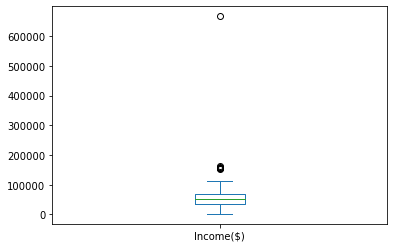

In [7]:
df.rename(columns = {' Income ':'Income($)'}, inplace = True)
df['Income($)'] = df['Income($)'].str.replace(',', '')
df['Income($)'] = df['Income($)'].str.replace('$', '')
df["Income($)"] = pd.to_numeric(df["Income($)"], downcast="float")
df['Income($)'].plot(kind = 'box')

In [8]:
df[df['Income($)']>120000].shape # 8 observations were existing
df[df['Income($)']>200000].shape  # 1 observation is existing
df['Income($)'].max() # 666666 was the Income
df = df[df['Income($)'] <200000]
df.shape

df['Income($)'].isnull().sum()

0

#### Removing ID Column as it is redundent

In [9]:
df = df.drop('ID', axis = 1)

In [10]:
df

,Year_Birth,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


#### Treating Age Column

<AxesSubplot:>

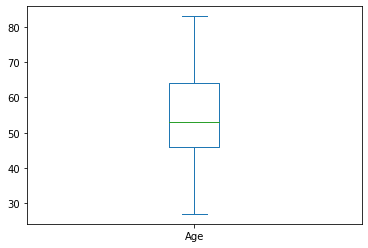

In [11]:
# Created Age from Year_Birth and removed Year_Birth

today = str(datetime. date. today()); 
curr_year = int(today[:4])

df['Age'] = curr_year - df['Year_Birth']

df = df.drop('Year_Birth', axis = 1)
# drop ID as it is redundent

df = df[df['Age']<84]

df['Age'].plot(kind = 'box')

#### Country ME removal

In [12]:
df = df[df['Country'] != 'ME']

In [13]:
df.shape

(2209, 27)

#### Creating a column for Retired or working based on the age of 60

In [14]:
# Not retired
df[df['Age']<=60]['Age'].nunique() # There are 34 nuniques in age group which are not retired
df[df['Age']<=60].shape[0] # around 1521 observations which are of not retired personal

# Retired
df[df['Age']>60]['Age'].nunique() # There are 22 nuniques in age group which are retired
df[df['Age']>60].shape[0] # around 685 observations which are of retired personal

df['Retired'] = df['Age'].map(lambda x:'Working' if x <=60 else 'Retired')
df['Retired'].value_counts()

Working    1523
Retired     686
Name: Retired, dtype: int64

#### Treatment of Duplicated

In [15]:
df.duplicated().sum() # 47 found

df.shape # (2206, 28)

df.drop_duplicates(inplace = True)

In [16]:
df.shape

(2162, 28)

**Adding a Column total_spends**

In [17]:
df['total_spends'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [18]:
df.shape

(2162, 29)

## 2.5 Data Statistical Summary <a class="anchor" id="chapter2.5"></a>

#### Understanding the Statistical summary of Object and numeric data

In [19]:
df.agg({'mean', 'median', lambda x: x.mode().iloc[0]}).T

,mean,median,<lambda>
Education,NaN,NaN,Graduation
Marital_Status,NaN,NaN,Married
Income($),51982.285156,51381.5,7500.0
Kidhome,0.442183,0.0,0.0
Teenhome,0.506013,0.0,0.0
Dt_Customer,2013-07-12 14:53:50.342275840,2013-07-12 00:00:00,2012-08-31 00:00:00
Recency,49.065217,49.0,56.0
MntWines,305.1605,175.5,2.0
MntFruits,26.270583,8.0,0.0
MntMeatProducts,167.254857,68.0,7.0


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income($),2162.0,51982.285156,21533.414062,1730.0,35326.5,51381.5,68445.75,162397.0
Kidhome,2162.0,0.442183,0.537046,0.0,0.0,0.0,1.00,2.0
Teenhome,2162.0,0.506013,0.545234,0.0,0.0,0.0,1.00,2.0
Recency,2162.0,49.065217,28.974177,0.0,24.0,49.0,74.00,99.0
MntWines,2162.0,305.160500,337.358034,0.0,24.0,175.5,505.00,1493.0
MntFruits,2162.0,26.270583,39.604013,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2162.0,167.254857,225.222784,0.0,16.0,68.0,231.75,1725.0
MntFishProducts,2162.0,37.509713,54.721813,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2162.0,27.001850,41.068097,0.0,1.0,8.0,33.00,262.0
MntGoldProds,2162.0,44.044403,51.903765,0.0,9.0,24.0,56.00,321.0


In [21]:
df.describe(include = 'object')

,Education,Marital_Status,Country,Retired
count,2162,2162,2162,2162
unique,5,8,7,2
top,Graduation,Married,SP,Working
freq,1088,838,1052,1489


# 3. Exploratory Data Analysis <a class="anchor" id="chapter3"></a>

## 3.1 Data Frequency Understanding <a class="anchor" id="chapter3.1"></a>

In [22]:
cat_vars = df[['Education', 'Marital_Status', 'Country','Response','Complain', 'Kidhome', 'Teenhome', 'Retired']]

num_vars = df[['Income($)', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Age']]

In [23]:
for column in cat_vars.columns:
    Value_counts = cat_vars[column].value_counts()
    print('The name of the column is: ', column)
    print('The nunique features in ' + column + ' is: ', cat_vars[column].nunique())
    print(Value_counts)
    print('*'*35)

The name of the column is:  Education
The nunique features in Education is:  5
Graduation    1088
PhD            468
Master         360
2n Cycle       192
Basic           54
Name: Education, dtype: int64
***********************************
The name of the column is:  Marital_Status
The nunique features in Marital_Status is:  8
Married     838
Together    560
Single      459
Divorced    225
Widow        73
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
***********************************
The name of the column is:  Country
The nunique features in Country is:  7
SP     1052
SA      333
CA      263
AUS     146
IND     145
GER     116
US      107
Name: Country, dtype: int64
***********************************
The name of the column is:  Response
The nunique features in Response is:  2
0    1837
1     325
Name: Response, dtype: int64
***********************************
The name of the column is:  Complain
The nunique features in Complain is:  2
0    2142


## 3.2 Univariate Analysis <a class="anchor" id="chapter3.2"></a>

### 3.2.1 Categorical Column <a class="anchor" id="chapter3.2.1"></a>

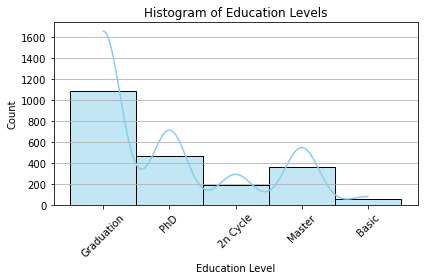

In [24]:

# Create histogram
sns.histplot(x='Education', data=df, kde=True, color='skyblue')

# Customizations
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Histogram of Education Levels')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability

# Add grid and adjust layout
plt.grid(axis='y')
plt.tight_layout()

# Display the plot
plt.show()

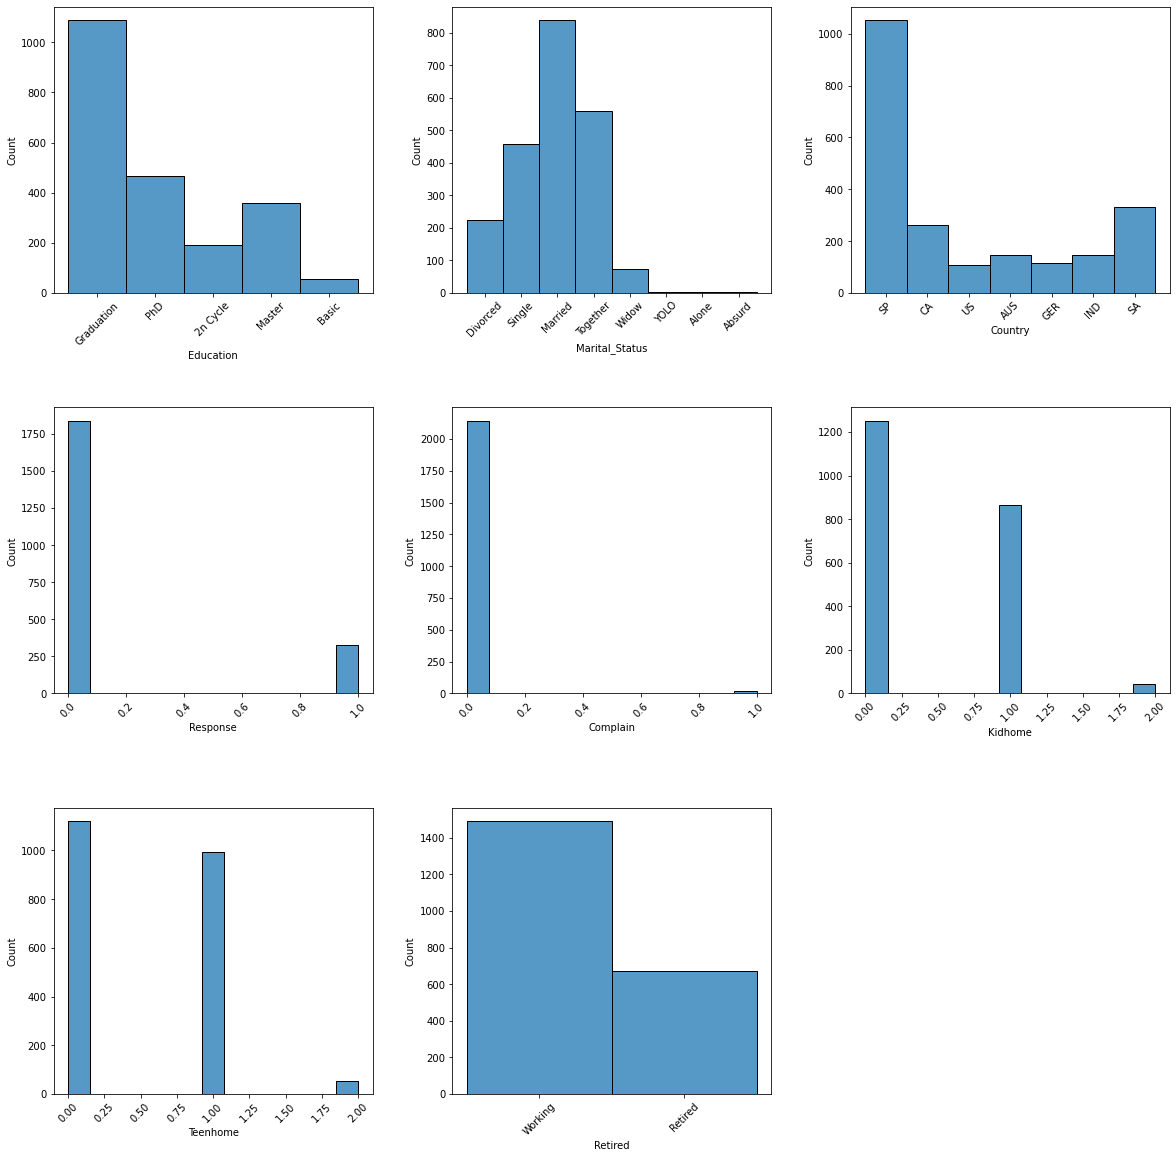

In [25]:
cat_vars = ['Education', 'Marital_Status', 'Country','Response','Complain', 'Kidhome', 'Teenhome', 'Retired']


plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
sns.histplot(x = 'Education', data = df)
plt.xticks(rotation=45)

plt.subplot(3,3,2)
sns.histplot(x = 'Marital_Status', data = df)
plt.xticks(rotation=45)

plt.subplot(3,3,3)
sns.histplot(x = 'Country', data = df)
plt.xticks(rotation=45)

plt.subplot(3,3,4)
sns.histplot(x = 'Response', data = df)
plt.xticks(rotation=45)

plt.subplot(3,3,5)
sns.histplot(x = 'Complain', data = df)
plt.xticks(rotation=45)

plt.subplot(3,3,6)
sns.histplot(x = 'Kidhome', data = df)
plt.xticks(rotation=45)

plt.subplot(3,3,7)
sns.histplot(x = 'Teenhome', data = df)
plt.xticks(rotation=45)

plt.subplot(3,3,8)
sns.histplot(x = 'Retired', data = df)
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.show()

## 3.2.2 Numerical Column <a class="anchor" id="chapter3.2.2"></a>

**Univariate Analysis of Numerical Column (Part 1 of 3)**

The below is for Income, Recency and Age Data

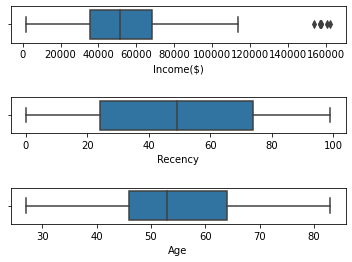

In [26]:

plt.subplot(3,1,1)
sns.boxplot(x="Income($)",data=df)

plt.subplot(3,1,2)
sns.boxplot(x="Recency",data=df)

plt.subplot(3,1,3)
sns.boxplot(x="Age",data=df)

plt.subplots_adjust(hspace=1.5, wspace=0.25)


**Univariate Analysis for Products**

**Univariate Analysis of Numerical Column (Part 2 of 3)**

The below is for MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts and MntGoldProds.

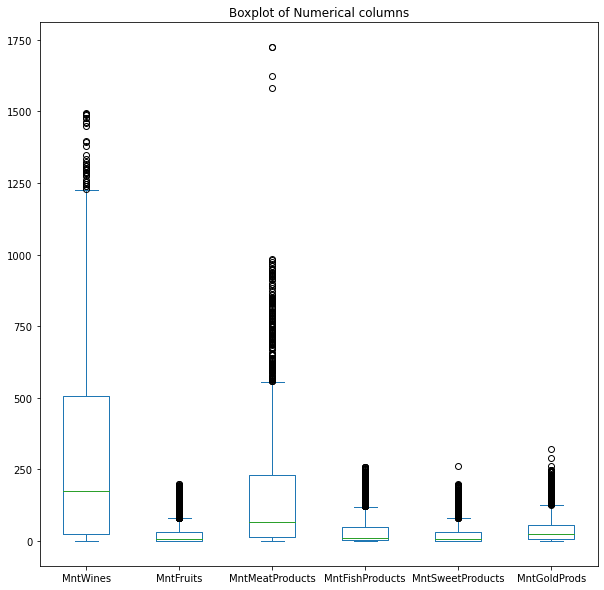

In [27]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']].plot(kind = 'box', figsize = (10,10), title = 'Boxplot of Numerical columns');
plt.show()
# Just to have a broad look at products sold

**Univariate Analysis for Purchases**

**Univariate Analysis of Numerical Column (Part 3 of 3)**

The below is for NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases and NumWebVisitsMonth.

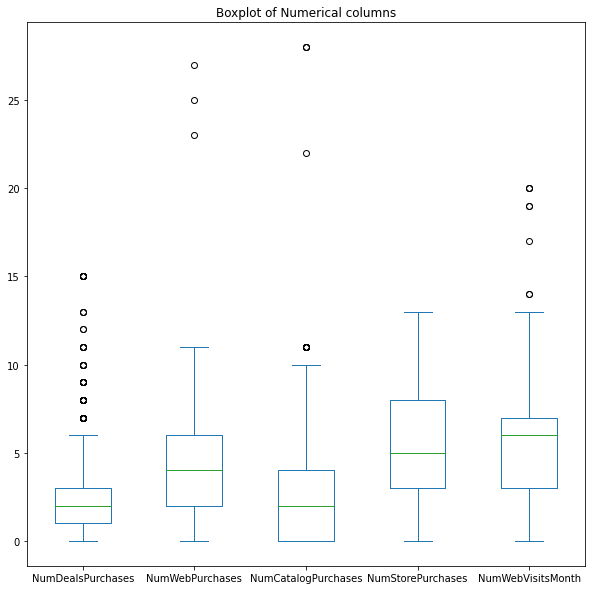

In [28]:
df[['NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']].plot(kind = 'box', figsize = (10,10), title = 'Boxplot of Numerical columns');

# Just to have a broad look at Purchase types

## 3.3 Bivariate Analysis <a class="anchor" id="chapter3.3"></a>

In [29]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577


In [30]:
df.columns

Index(['Education', 'Marital_Status', 'Income($)', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Retired', 'total_spends'],
      dtype='object')

In [31]:
df[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34
...,...,...,...,...,...,...
2235,372,18,126,47,48,78
2236,5,10,13,3,8,16
2237,185,2,88,15,5,14
2238,267,38,701,149,165,63


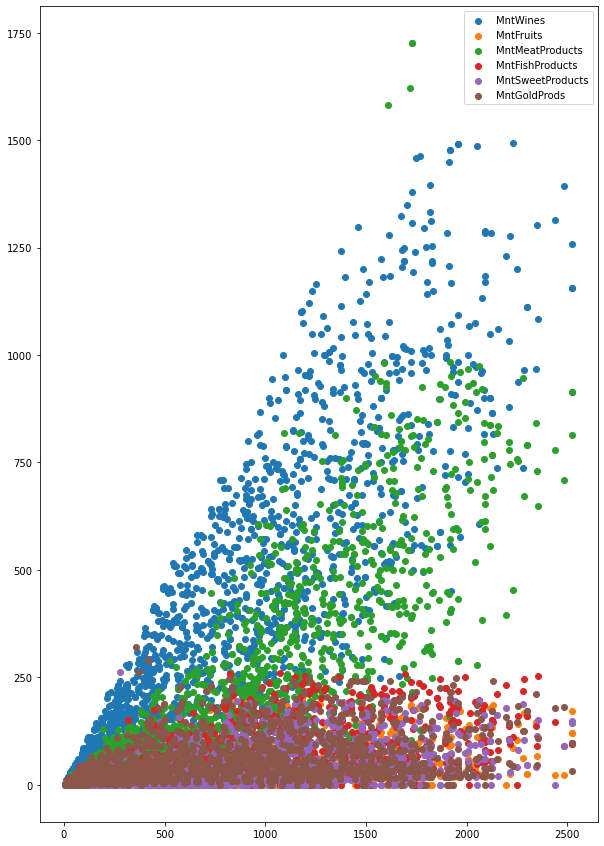

In [32]:
# sns.scatterplot(x = 'variable', y = 'value', data = df1, hue = 'variable' )
plt.figure(figsize = (10,15))
plt.scatter(x = 'total_spends', y = 'MntWines', data = df)
plt.scatter(x = 'total_spends', y = 'MntFruits', data = df)
plt.scatter(x = 'total_spends', y = 'MntMeatProducts', data = df)
plt.scatter(x = 'total_spends', y = 'MntFishProducts', data = df)
plt.scatter(x = 'total_spends', y = 'MntSweetProducts', data = df)
plt.scatter(x = 'total_spends', y = 'MntGoldProds', data = df)

plt.legend()

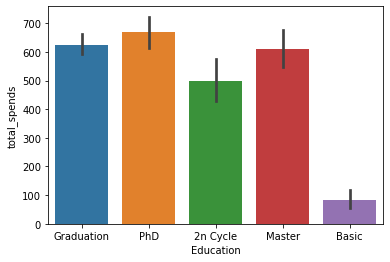

In [33]:
sns.barplot(y = 'total_spends', x = 'Education', data = df);

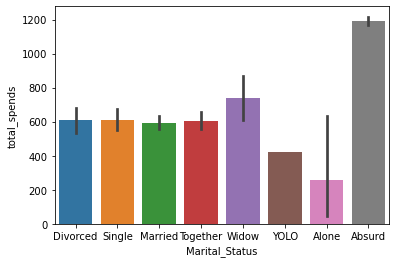

In [34]:
sns.barplot(y = 'total_spends', x = 'Marital_Status', data = df);

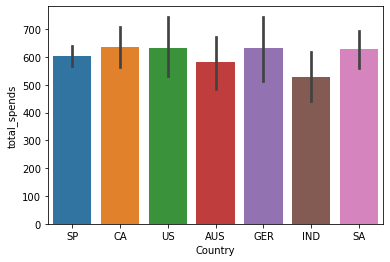

In [35]:
sns.barplot(y = 'total_spends', x = 'Country', data = df);

## 3.4 Pearson correlation coefficient <a class="anchor" id="chapter3.4"></a>

In [36]:
corr_matrix = df[['Education', 'Marital_Status', 'Income($)', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 
       'Response', 'Complain', 'Country', 'Age', 'Retired', 'total_spends']].corr()
corr_matrix

,Income($),Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,total_spends
Income($),1.000000,-0.515593,0.036221,0.003994,0.687295,0.505874,0.689997,0.515679,0.521262,0.387598,-0.108834,0.458234,0.694189,0.629649,-0.648120,0.161422,-0.028321,0.201110,0.791005
Kidhome,-0.515593,1.000000,-0.045432,0.017119,-0.499540,-0.374079,-0.437933,-0.385501,-0.376397,-0.353958,0.213821,-0.374350,-0.503170,-0.503854,0.447084,-0.078844,0.037400,-0.241721,-0.558618
Teenhome,0.036221,-0.045432,1.000000,0.017067,0.005002,-0.173884,-0.259630,-0.201945,-0.162250,-0.020237,0.382059,0.159946,-0.110763,0.048572,0.127985,-0.157777,0.007797,0.364129,-0.136693
Recency,0.003994,0.017119,0.017067,1.000000,0.011567,-0.008919,0.022658,-0.000061,0.026256,0.016693,0.011499,-0.005439,0.020364,-0.004194,-0.015484,-0.201640,0.005620,0.015771,0.017566
MntWines,0.687295,-0.499540,0.005002,0.011567,1.000000,0.385801,0.567022,0.394792,0.387636,0.394170,0.010093,0.553793,0.632253,0.637632,-0.321810,0.246370,-0.036803,0.167374,0.892614
MntFruits,0.505874,-0.374079,-0.173884,-0.008919,0.385801,1.000000,0.548616,0.589604,0.565801,0.398938,-0.131796,0.303756,0.484628,0.459943,-0.415009,0.122706,-0.002857,0.011732,0.612721
MntMeatProducts,0.689997,-0.437933,-0.259630,0.022658,0.567022,0.548616,1.000000,0.569916,0.532901,0.357611,-0.119424,0.304957,0.732476,0.484875,-0.536220,0.238845,-0.021266,0.035213,0.845436
MntFishProducts,0.515679,-0.385501,-0.201945,-0.000061,0.394792,0.589604,0.569916,1.000000,0.577673,0.427842,-0.139619,0.299173,0.526828,0.458757,-0.439657,0.103646,-0.019092,0.044875,0.639288
MntSweetProducts,0.521262,-0.376397,-0.162250,0.026256,0.387636,0.565801,0.532901,0.577673,1.000000,0.357455,-0.120480,0.332032,0.491345,0.456680,-0.419142,0.115348,-0.020715,0.020581,0.604280
MntGoldProds,0.387598,-0.353958,-0.020237,0.016693,0.394170,0.398938,0.357611,0.427842,0.357455,1.000000,0.051356,0.406890,0.442674,0.391489,-0.244269,0.144869,-0.030621,0.062033,0.529464


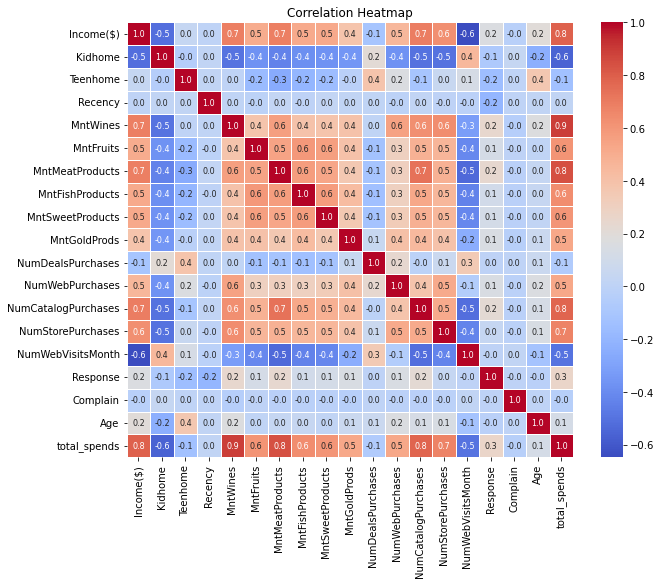

In [37]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

## 4. KPI/ Metric based questions <a class="anchor" id="chapter4"></a>

**These questions have a specific ask (pin-pointed) and getting to the required outcome is quite straightforward.**

1. How many customers accepted the first two campaigns?


2. What is the average and median # Web Purchases for each Web Visit? While commenting on the findings on this summary also report # of customers to consider how many customers that finding is based upon.


3. Compare the average and median of ‘total spends’ of customers based on:


    1. Website visits: Customers with <10 visits versus >=10 visits?
    2. Store purchases: Customers with <10 purchases versus >=10 purchases?
    3. Discount purchases: Customers with <10 purchases versus >=10 purchases?
    

4. What kind of relationship ‘total spends’ has with different numerical variables? 
    
    Use suitable plots to show these results and report your findings. For discrete variables (numeric in nature but with low number of unique values) applying binning to create bins with sufficient and equitable number of data points to observe this relationship (use a different plot type than continuous variables).
    

5. Show Average and Median of ‘total spends’ for different object variables (for their respective labels) and report your findings

In [38]:
df.shape

(2162, 29)

In [39]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577


#### 1. How many customers accepted the first two campaigns?

In [40]:
df.groupby(['AcceptedCmp1', 'AcceptedCmp2'])['AcceptedCmp2'].count()

AcceptedCmp1  AcceptedCmp2
0             0               2006
              1                 16
1             0                127
              1                 13
Name: AcceptedCmp2, dtype: int64

In [41]:
df.columns

Index(['Education', 'Marital_Status', 'Income($)', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Retired', 'total_spends'],
      dtype='object')

In [42]:
df[['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum()

AcceptedCmp3    158
AcceptedCmp4    162
AcceptedCmp5    159
AcceptedCmp1    140
AcceptedCmp2     29
dtype: int64

In [43]:
# The First two Campaigns include the first campaign and the second campaign
# The First Campaign include 127 + 13 and in the second campaign around 16 can be added who have not gone through the first campaign
print('The total number of campaign accepted in the first two campaigns are ', (127+13+16))

The total number of campaign accepted in the first two campaigns are  156


#### 2. What is the average and median # Web Purchases for each Web Visit? While commenting on the findings on this summary also report # of customers to consider how many customers that finding is based upon.

In [44]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577


In [45]:
x = df.groupby('NumWebVisitsMonth')['NumWebPurchases'].agg({'mean','median','count'})
x 

,mean,median,count
NumWebVisitsMonth,,,
0,3.400000,1.5,10
1,3.489510,3.0,143
2,4.239796,4.0,196
3,4.510101,5.0,198
4,4.511737,5.0,213
5,4.370909,4.0,275
6,4.259146,3.0,328
7,3.711640,3.0,378
8,3.878049,3.0,328


#### 3. Compare the average and median of ‘total spends’ of customers based on:

    1. Website visits: Customers with <10 visits versus >=10 visits?
    2. Store purchases: Customers with <10 purchases versus >=10 purchases?
    3. Discount purchases: Customers with <10 purchases versus >=10 purchases?

**Inference**
There is difference between Mean and Median of all the aspects of purchases

In [46]:
df[df['NumWebVisitsMonth'] < 10]['total_spends'].agg({'mean','median'})

mean      609.965116
median    401.000000
Name: total_spends, dtype: float64

In [47]:
df[df['NumWebVisitsMonth'] >= 10]['total_spends'].agg({'mean','median'})

mean      119.333333
median     52.000000
Name: total_spends, dtype: float64

In [48]:
df[df['NumStorePurchases']<10]['total_spends'].agg({'mean','median'})

mean      481.563483
median    221.500000
Name: total_spends, dtype: float64

In [49]:
df[df['NumStorePurchases'] >= 10]['total_spends'].agg({'mean','median'})

mean      1192.863874
median    1124.000000
Name: total_spends, dtype: float64

In [50]:
df[df['NumDealsPurchases'] < 10]['total_spends'].agg({'mean','median'})

mean      604.01028
median    393.00000
Name: total_spends, dtype: float64

In [51]:
df[df['NumDealsPurchases'] >= 10]['total_spends'].agg({'mean','median'})

mean      921.590909
median    826.000000
Name: total_spends, dtype: float64

### 4. What kind of relationship ‘total spends’ has with different numerical variables? 

Use suitable plots to show
these results and report your findings. For discrete variables (numeric in nature but with low number of
unique values) applying binning to create bins with sufficient and equitable number of data points to
observe this relationship (use a different plot type than continuous variables).

#### Relationship between Total Spents and Food bought.

In [52]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577


In [53]:
df_relationship_totalSpent_Food = df[['total_spends','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts',
                                      'MntSweetProducts','MntGoldProds']]

correlation_matrix_01 = df_relationship_totalSpent_Food.corr()
correlation_matrix_01

,total_spends,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
total_spends,1.000000,0.892614,0.612721,0.845436,0.639288,0.604280,0.529464
MntWines,0.892614,1.000000,0.385801,0.567022,0.394792,0.387636,0.394170
MntFruits,0.612721,0.385801,1.000000,0.548616,0.589604,0.565801,0.398938
MntMeatProducts,0.845436,0.567022,0.548616,1.000000,0.569916,0.532901,0.357611
MntFishProducts,0.639288,0.394792,0.589604,0.569916,1.000000,0.577673,0.427842
MntSweetProducts,0.604280,0.387636,0.565801,0.532901,0.577673,1.000000,0.357455
MntGoldProds,0.529464,0.394170,0.398938,0.357611,0.427842,0.357455,1.000000


<AxesSubplot:>

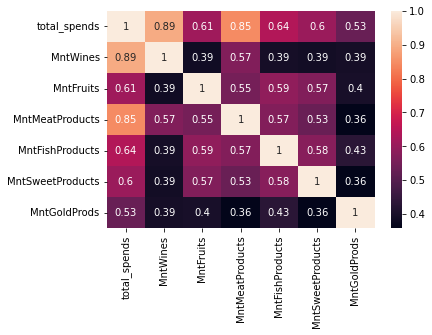

In [54]:
df_Food_corr_tot_spend = df[['total_spends','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts',
                                      'MntSweetProducts','MntGoldProds']].corr()

sns.heatmap(df_Food_corr_tot_spend, annot=True)

#### Relationship between Total Spents and its Channel of Buying

In [55]:
df.describe()

,Income($),Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,total_spends
count,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.00000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000
mean,51982.285156,0.442183,0.506013,49.065217,305.160500,26.270583,167.254857,37.509713,27.001850,44.044403,2.325624,4.09667,2.667438,5.800648,5.323312,0.073080,0.074931,0.073543,0.064755,0.013414,0.150324,0.009251,54.115171,607.241906
std,21533.414062,0.537046,0.545234,28.974177,337.358034,39.604013,225.222784,54.721813,41.068097,51.903765,1.921018,2.74463,2.928414,3.251674,2.422420,0.260329,0.263340,0.261086,0.246150,0.115064,0.357471,0.095757,11.696025,603.088914
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000
25%,35326.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.00000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.00000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,397.000000
75%,68445.750000,1.000000,1.000000,74.000000,505.000000,33.000000,231.750000,50.000000,33.000000,56.000000,3.000000,6.00000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1047.750000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.00000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83.000000,2525.000000


In [56]:
df_relationship_totalSpend_Channel = df[['total_spends','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

Correlation_matrix_02 = df_relationship_totalSpend_Channel.corr()
Correlation_matrix_02

,total_spends,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
total_spends,1.000000,-0.064061,0.528390,0.778398,0.674377,-0.496976
NumDealsPurchases,-0.064061,1.000000,0.237931,-0.007969,0.062994,0.346689
NumWebPurchases,0.528390,0.237931,1.000000,0.383647,0.516001,-0.052310
NumCatalogPurchases,0.778398,-0.007969,0.383647,1.000000,0.515448,-0.518828
NumStorePurchases,0.674377,0.062994,0.516001,0.515448,1.000000,-0.433947
NumWebVisitsMonth,-0.496976,0.346689,-0.052310,-0.518828,-0.433947,1.000000


<AxesSubplot:>

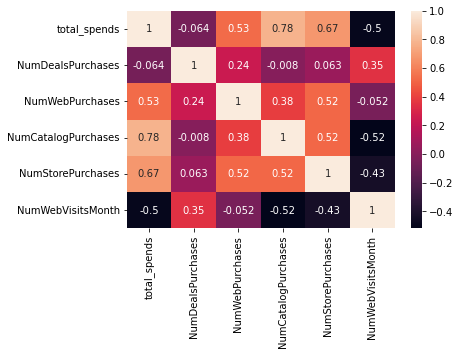

In [57]:
sns.heatmap(Correlation_matrix_02, annot = True)

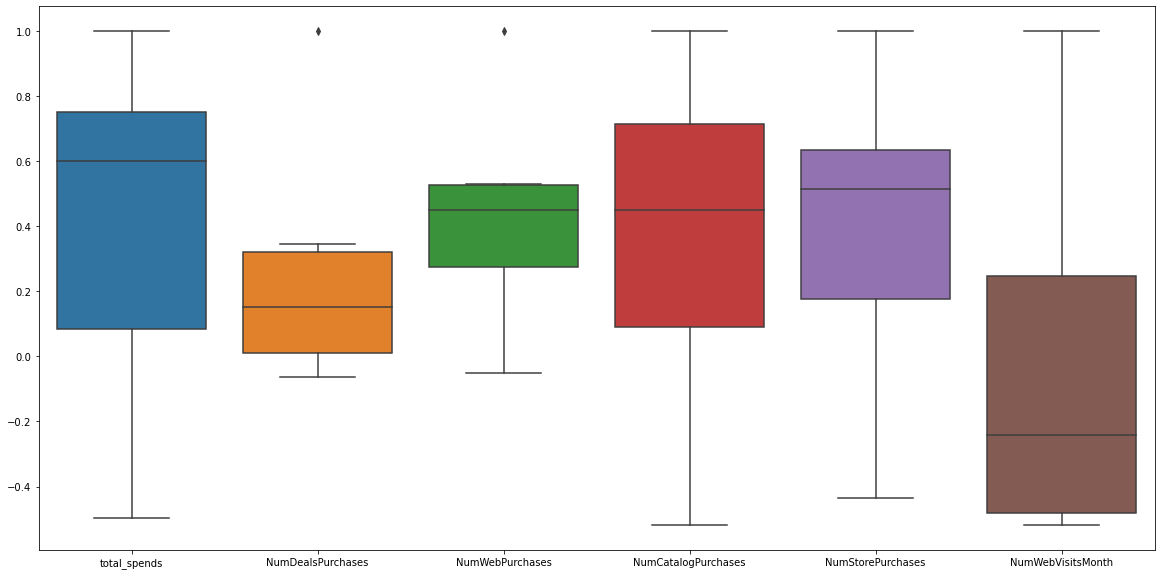

In [58]:
# Calculate the correlation matrix

plt.figure(figsize = (20,10))
sns.boxplot(data = Correlation_matrix_02)
plt.show()

#### Relationship between Total Spents and General Parameters like Age and Income

In [59]:
df_relationship_totalSpend_General = df[['total_spends', 'Income($)', 'Age']]

Correlation_matrix_03 = df_relationship_totalSpend_General.corr()
Correlation_matrix_03

,total_spends,Income($),Age
total_spends,1.000000,0.791005,0.118359
Income($),0.791005,1.000000,0.201110
Age,0.118359,0.201110,1.000000


<AxesSubplot:>

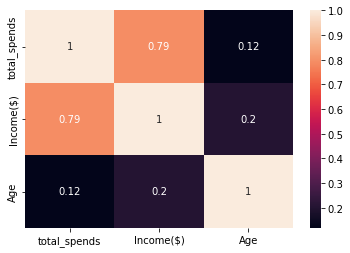

In [60]:
sns.heatmap(Correlation_matrix_03, annot = True)

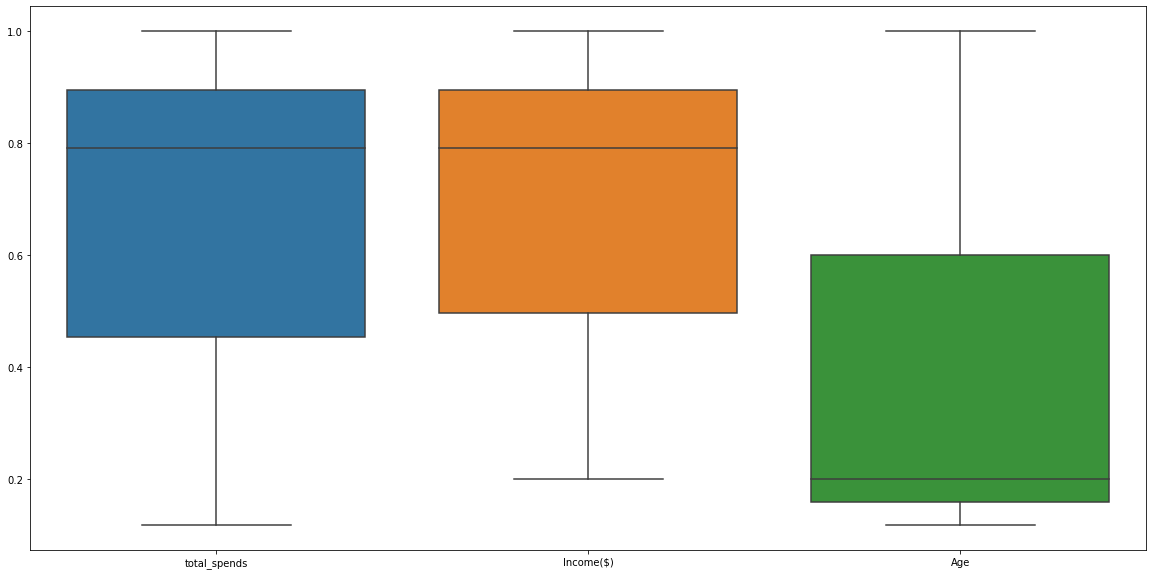

In [61]:
# Calculate the correlation matrix

plt.figure(figsize = (20,10))
sns.boxplot(data = Correlation_matrix_03)
plt.show()

In [62]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone','Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO','YOLO/Absurd')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd','YOLO/Absurd')

<AxesSubplot:ylabel='Marital_Status'>

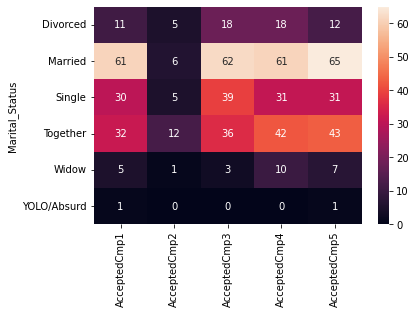

In [63]:
campaign_accept = df.groupby('Marital_Status')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5']].sum()
sns.heatmap(campaign_accept, annot = True)

<AxesSubplot:ylabel='Country'>

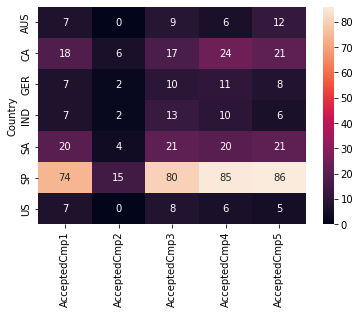

In [64]:
campaign_accept = df.groupby('Country')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5']].sum()
sns.heatmap(campaign_accept, annot = True)

<AxesSubplot:ylabel='Education-Kidhome'>

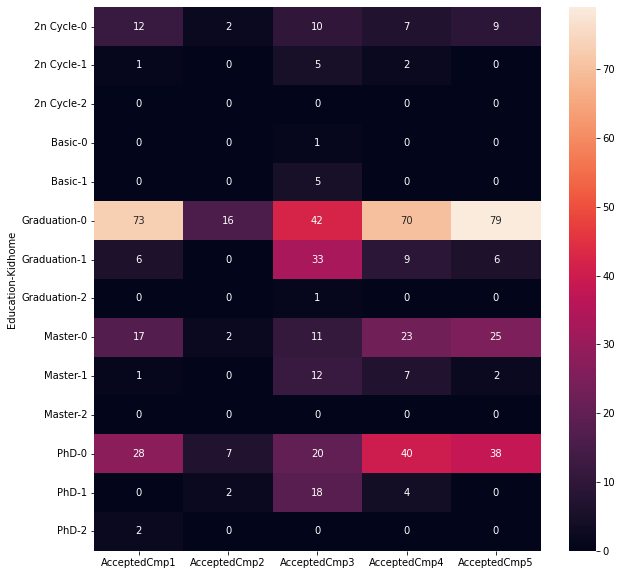

In [65]:
plt.figure(figsize=(10,10))
campaign_accept = df.groupby(['Education','Kidhome'])[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5']].sum()
sns.heatmap(campaign_accept, annot = True)

In [66]:
df.groupby('Country')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5']].sum()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Country,,,,,
AUS,7,0,9,6,12
CA,18,6,17,24,21
GER,7,2,10,11,8
IND,7,2,13,10,6
SA,20,4,21,20,21
SP,74,15,80,85,86
US,7,0,8,6,5


In [67]:
df.groupby('Country')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Country,,,,
AUS,2.239726,4.047945,2.705479,5.616438
CA,2.406844,4.323194,2.752852,5.878327
GER,2.077586,4.000000,2.810345,6.034483
IND,2.510345,3.986207,2.468966,5.344828
SA,2.417417,4.126126,2.726727,5.915916
SP,2.255703,4.024715,2.592205,5.779468
US,2.663551,4.476636,3.074766,6.074766


**5. Show Average and Median of ‘total spends’ for different object variables (for their respective labels) and report your findings.**

**Inference**
PhD followed by Graduates and Masters are the most spenders
YOLO/Absurd are the most spenders
US, CA and GER are the most spenders

In [68]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577


In [69]:
df[['Education', 'Marital_Status', 'Country', 'Retired']].value_counts()

Education   Marital_Status  Country  Retired
Graduation  Married         SP       Working    153
            Single          SP       Working     90
            Together        SP       Working     90
PhD         Married         SP       Working     68
Graduation  Married         SP       Retired     52
                                               ... 
            Widow           US       Retired      1
                            IND      Retired      1
                            GER      Working      1
2n Cycle    Divorced        CA       Retired      1
PhD         YOLO/Absurd     IND      Working      1
Length: 258, dtype: int64

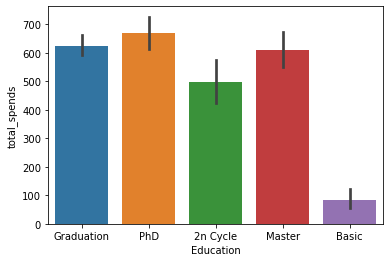

In [70]:
sns.barplot(y = 'total_spends', x = 'Education', data = df);

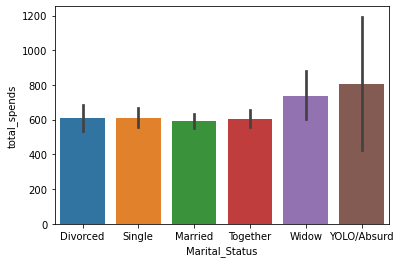

In [71]:
sns.barplot(y = 'total_spends', x = 'Marital_Status', data = df);

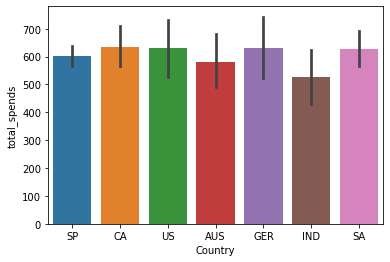

In [72]:
sns.barplot(y = 'total_spends', x = 'Country', data = df);

In [73]:
df.groupby('Country')['total_spends'].sum()

Country
AUS     84970
CA     167077
GER     73198
IND     76507
SA     209261
SP     634298
US      67546
Name: total_spends, dtype: int64

# 5. Open-Ended Questions and Recommendations <a class="anchor" id="chapter5"></a>

These are business-oriented questions which do not tell much about the kind of expected outcome, rather they require you to check if a certain phenomenon is occurring or not, or whether there is plausibility of a certain pattern. Often these questions need to be asked on your own and to answer them one needs to think through in terms of: ‘what kind of output is expected’, ‘how to get it – which variables and by doing what’ and ‘whether the achieved outcome helps answer the question’. Since this can be iterative, it requires a lot of brainstorming and asking the right questions (as per the business objective).

**Set A**

1. What kind of customers spend more?
2. What kind of customers had a higher Website conversion?
3. “Website visits helped drive overall sales”. Justify or refute this statement using an appropriate summary/analysis/result.
4. Is there any relationship between sales of Meat and Fish products?
5. What kind of customers responded the most in the last campaign?

**Set B**

6. What kind of customers spend more on different product types?
7. What kind of customers made more Website visits?
8. Is there any relationship between sales of Wine and Meat products?
9. Did certain customers prefer Web Purchase over Store Purchases? If yes, how were their profiles different?
10. Is customer complaints an area of concern that should be closely looked at? Show appropriate metrics to support your response.

## 5.1 - Set A <a class="anchor" id="chapter5.1"></a>

**1. What kind of customers spend more?**

**INFERENCE**

1. The customers who tend to spend more are individuals who have completed their education, are married, do not have children or teenagers, hold Serbian citizenship, and are currently employed rather than retired.


2. The individuals who have predominantly shown acceptance in the fifth campaign, with the highest number of responses, are those who primarily received information through in-store channels.


3. These are the customers who frequently purchase a larger quantity of meat and wines within the specific as stores.


In [74]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577


In [75]:
df['total_spends'].quantile([.25, 0.5, 0.75, 1])
# 0-24% quantile - for least spend
# 25-49% quantile - for Average spend
# 50-74% quantile - for Above Average spend
# 75-100% quantile - for max spend

# Considering the 75% and above quantile for understanding more spend

0.25      69.00
0.50     397.00
0.75    1047.75
1.00    2525.00
Name: total_spends, dtype: float64

In [76]:
df_more = df[df['total_spends'] > df['total_spends'].quantile(0.75)]
df_more.shape

(541, 29)

In [77]:
df_more.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190
5,PhD,Single,71691.0,0,0,2014-03-17,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP,65,Retired,1192


In [144]:
df_more.columns

Index(['Education', 'Marital_Status', 'Income($)', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Retired', 'total_spends',
       'tot_means_of_Purchase'],
      dtype='object')

In [145]:
df_more_cat = df_more[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Response', 'Complain', 
                        'Country', 'Retired']]
df_more_num = df_more[[ 'Income($)', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Age']]

In [146]:
df_more_num[['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum()

AcceptedCmp3     50
AcceptedCmp4     87
AcceptedCmp5    146
AcceptedCmp1    109
AcceptedCmp2     23
dtype: int64

In [147]:
df_more_num[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']].sum().sort_values(ascending = False)

NumStorePurchases      4590
NumCatalogPurchases    3203
NumWebPurchases        3049
NumWebVisitsMonth      1971
NumDealsPurchases      1014
dtype: int64

In [148]:
df_more_num[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_index(ascending = False)

MntWines            401055
MntSweetProducts     34516
MntMeatProducts     247266
MntGoldProds         43083
MntFruits            33391
MntFishProducts      48160
dtype: int64

In [149]:
for column in df_more_cat.columns:
    Value_counts = df_more_cat[column].value_counts()
    print('The name of the column is: ', column)
    print('The nunique features in ' + column + ' is: ', df_more_cat[column].nunique())
    print(Value_counts)
    print('*'*35)

The name of the column is:  Education
The nunique features in Education is:  4
Graduation    285
PhD           135
Master         81
2n Cycle       40
Name: Education, dtype: int64
***********************************
The name of the column is:  Marital_Status
The nunique features in Marital_Status is:  6
Married        195
Together       138
Single         123
Divorced        58
Widow           25
YOLO/Absurd      2
Name: Marital_Status, dtype: int64
***********************************
The name of the column is:  Kidhome
The nunique features in Kidhome is:  2
0    508
1     33
Name: Kidhome, dtype: int64
***********************************
The name of the column is:  Teenhome
The nunique features in Teenhome is:  3
0    377
1    156
2      8
Name: Teenhome, dtype: int64
***********************************
The name of the column is:  Response
The nunique features in Response is:  2
0    378
1    163
Name: Response, dtype: int64
***********************************
The name of the column 

**2. What kind of customers had a higher Website conversion?**

**INFERENCE**

1. Customers who demonstrate higher website conversion rates typically possess the following characteristics: they have completed their education, are married, do not have children or teenagers, hold Serbian citizenship, and are currently employed instead of being retired.


2. The individuals who have predominantly shown acceptance in the 3rd, 4th and 5th campaign, with the highest number of responses, are those who primarily received information through in-store channels and web visit purchases.


3. These are the customers who frequently purchase a larger quantity of meat and wines within the specific as stores.

In [150]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18


<AxesSubplot:>

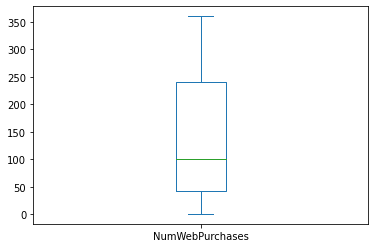

In [151]:
df['NumWebPurchases'].value_counts().plot(kind = 'box')

In [152]:
df['NumWebPurchases'].shape

(2162,)

In [153]:
df_non_zeros = df[df['NumWebPurchases'] != 0]
df_non_zeros.shape

(2115, 30)

In [154]:
df_non_zeros.head(3)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,65,Retired,251,11


In [155]:
df_non_zeros_cat = df_non_zeros[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Response', 'Complain', 
                        'Country', 'Retired']]
df_non_zeros_num = df_non_zeros[[ 'Income($)', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Age']]

In [156]:
df_non_zeros

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,65,Retired,251,11
3,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,56,Working,11,4
4,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,34,Working,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,47,Working,689,20
2236,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,46,Working,55,5
2237,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,47,Working,309,14
2238,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,45,Working,1383,20


In [157]:
df_non_zeros[['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum()

AcceptedCmp3    157
AcceptedCmp4    162
AcceptedCmp5    159
AcceptedCmp1    140
AcceptedCmp2     29
dtype: int64

In [158]:
df_non_zeros[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']].sum().sort_values(ascending = False)

NumStorePurchases      12443
NumWebVisitsMonth      11229
NumWebPurchases         8857
NumCatalogPurchases     5653
NumDealsPurchases       4904
dtype: int64

In [159]:
df_non_zeros[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_index(ascending = False)

MntWines            659163
MntSweetProducts     58306
MntMeatProducts     354702
MntGoldProds         95042
MntFruits            56706
MntFishProducts      81008
dtype: int64

In [160]:
for column in df_non_zeros_cat.columns:
    Value_counts = df_non_zeros_cat[column].value_counts()
    print('The name of the column is: ', column)
    print('The nunique features in ' + column + ' is: ', df_non_zeros_cat[column].nunique())
    print(Value_counts)
    print('*'*35)

The name of the column is:  Education
The nunique features in Education is:  5
Graduation    1063
PhD            458
Master         355
2n Cycle       186
Basic           53
Name: Education, dtype: int64
***********************************
The name of the column is:  Marital_Status
The nunique features in Marital_Status is:  6
Married        822
Together       546
Single         453
Divorced       218
Widow           72
YOLO/Absurd      4
Name: Marital_Status, dtype: int64
***********************************
The name of the column is:  Kidhome
The nunique features in Kidhome is:  3
0    1228
1     844
2      43
Name: Kidhome, dtype: int64
***********************************
The name of the column is:  Teenhome
The nunique features in Teenhome is:  3
0    1092
1     975
2      48
Name: Teenhome, dtype: int64
***********************************
The name of the column is:  Response
The nunique features in Response is:  2
0    1791
1     324
Name: Response, dtype: int64
*******************

**3. “Website visits helped drive overall sales”. Justify or refute this statement using an appropriate summary/analysis/result.**

In [161]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18


In [162]:
df_website = df.groupby('NumWebPurchases').mean()
df_website.head(2)

,Income($),Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,total_spends,tot_means_of_Purchase
NumWebPurchases,,,,,,,,,,,,,,,,,,,,,,,,
0,43213.636719,0.553191,0.489362,43.574468,12.638298,1.936170,146.872340,1.872340,1.531915,3.872340,2.638298,2.425532,2.085106,5.957447,0.021277,0.000000,0.0,0.0,0.000000,0.021277,0.021277,52.723404,168.723404,7.148936
1,33191.074219,0.813056,0.468843,47.952522,17.869436,2.510386,10.818991,4.326409,2.560831,9.124629,1.278932,0.323442,2.709199,6.228487,0.103858,0.002967,0.0,0.0,0.005935,0.062315,0.008902,51.385757,47.210682,5.311573


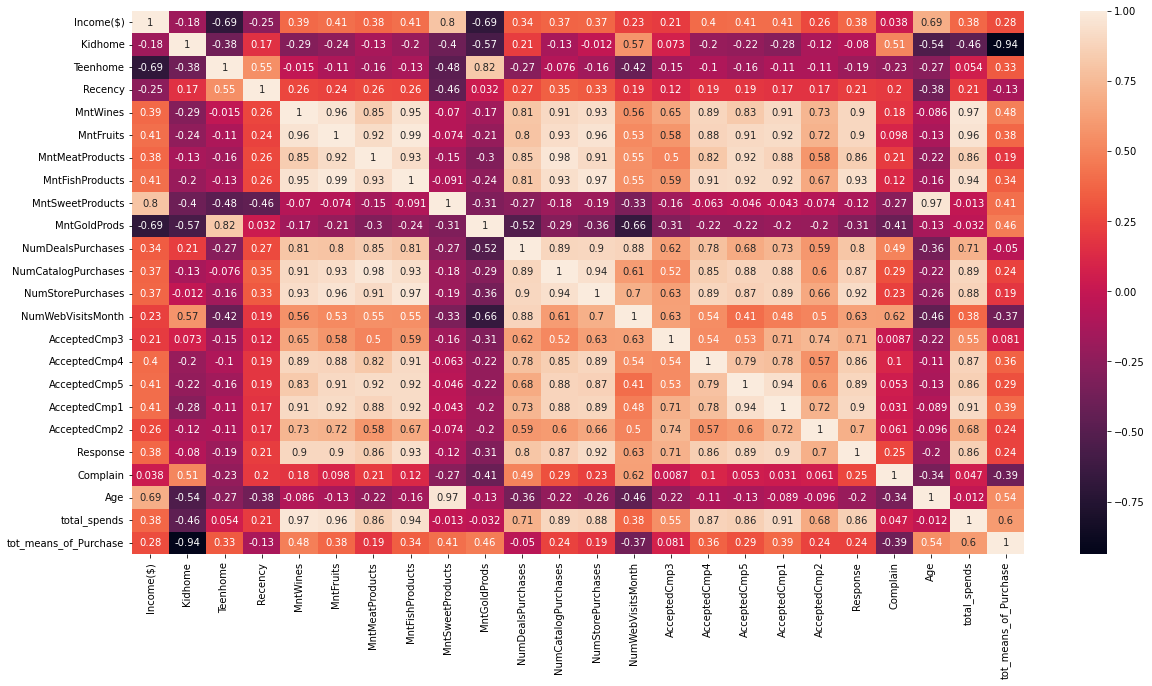

In [163]:
plt.figure(figsize = (20,10))
sns.heatmap(df_website.corr(), annot = True)
plt.show();

In [164]:
df_website.columns

Index(['Income($)', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Age', 'total_spends', 'tot_means_of_Purchase'],
      dtype='object')

**4. Is there any relationship between sales of Meat and Fish products?**

In [165]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18


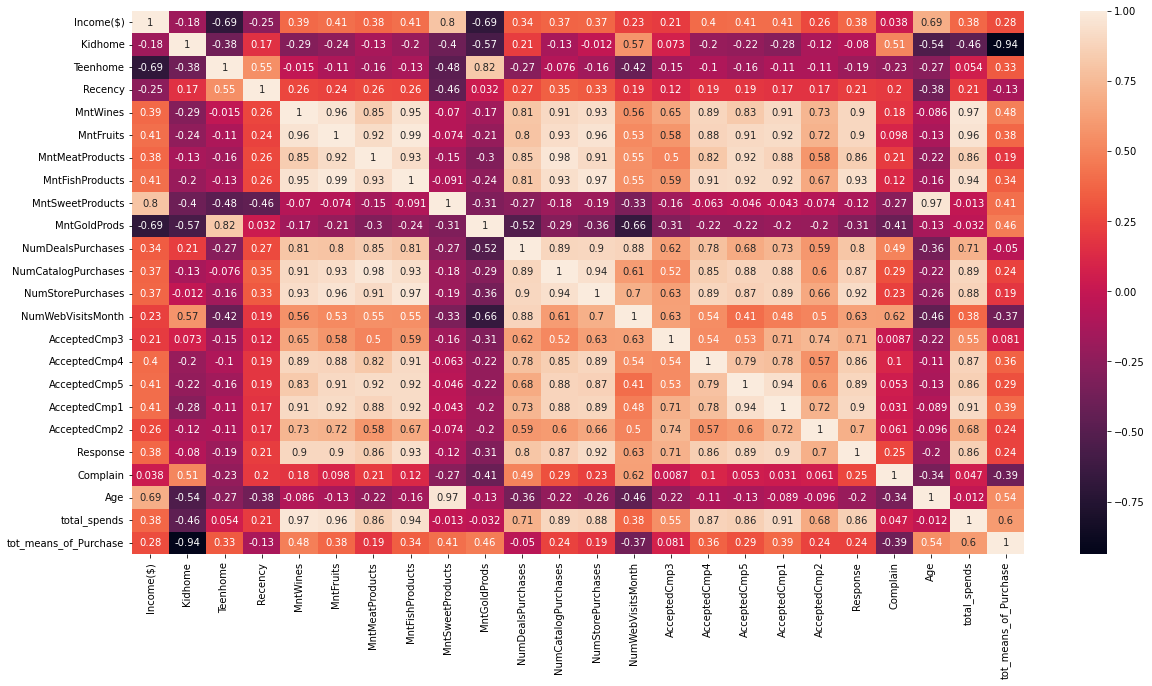

In [166]:
plt.figure(figsize = (20,10))
sns.heatmap(df_website.corr(), annot = True)
plt.show();

**Inference**

1. There is a strong positive correlation of 0.91 between the sales of meat and fish products.

**5. What kind of customers responded the most in the last campaign?**

**INFERENCE**

1. kind of customers responded the most in the last campaign typically possess the following characteristics: they have completed their Graduation, are married, do not have children or teenagers, do not complain, hold Serbian citizenship, and are currently employed instead of being retired.


2. The individuals uses in-store purchases, with the highest number on meat and wines.

In [167]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18


In [168]:
df_AcceptedCmp5 = df[df['AcceptedCmp5'] == 1]
df_AcceptedCmp5.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
35,PhD,Single,95169.0,0,0,2013-09-10,1,1285,21,449,106,20,20,1,4,3,4,1,0,0,1,1,0,1,0,SP,36,Working,1901,12
38,PhD,Single,84865.0,0,0,2013-09-05,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,1,0,SP,62,Retired,1688,16


In [169]:
df_last_campaign_cat = df_AcceptedCmp5[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Response', 'Complain', 
                        'Country', 'Retired']]
df_last_campaign_num = df_AcceptedCmp5[[ 'Income($)', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Age']]

In [170]:
df_last_campaign_num[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']].sum().sort_values(ascending = False)


NumStorePurchases      1322
NumCatalogPurchases     958
NumWebPurchases         871
NumWebVisitsMonth       468
NumDealsPurchases       170
dtype: int64

In [171]:
df_last_campaign_num[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_index(ascending = False)


MntWines            139263
MntSweetProducts     10142
MntMeatProducts      74554
MntGoldProds         12216
MntFruits             8736
MntFishProducts      11873
dtype: int64

In [172]:
for column in df_last_campaign_cat.columns:
    Value_counts = df_last_campaign_cat[column].value_counts()
    print('The name of the column is: ', column)
    print('The nunique features in ' + column + ' is: ', df_last_campaign_cat[column].nunique())
    print(Value_counts)
    print('*'*35)

The name of the column is:  Education
The nunique features in Education is:  4
Graduation    85
PhD           38
Master        27
2n Cycle       9
Name: Education, dtype: int64
***********************************
The name of the column is:  Marital_Status
The nunique features in Marital_Status is:  6
Married        65
Together       43
Single         31
Divorced       12
Widow           7
YOLO/Absurd     1
Name: Marital_Status, dtype: int64
***********************************
The name of the column is:  Kidhome
The nunique features in Kidhome is:  2
0    151
1      8
Name: Kidhome, dtype: int64
***********************************
The name of the column is:  Teenhome
The nunique features in Teenhome is:  3
0    140
1     16
2      3
Name: Teenhome, dtype: int64
***********************************
The name of the column is:  Response
The nunique features in Response is:  2
1    90
0    69
Name: Response, dtype: int64
***********************************
The name of the column is:  Complai

## 5.2 - Set B <a class="anchor" id="chapter5.2"></a>

**6. What kind of customers spend more on different product types?**

**Inference**

1. Graduated, married or in a relationship, from a Serbia country, responded 4 times more effectively, never complained in the last two years, have no children or teenagers, and are employed.

2. The mean and median are very close to each other, so there are likely few outliers.

3. The customers were either extreme in nature, buying in the first campaign or the fifth campaign.

4. There is a positive correlation between income and buying meat products in the fifth campaign.

5. Their average age is around 54 years old.

6. They mostly preferred web purchases, followed by store purchases and deals purchases.

7. There is a positive correlation between web visits per month and deals purchases and web purchases.

In [173]:
df.head(2)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18


In [174]:
spend_more_onproducts = df[(df['MntWines'] >df['MntWines'].mean()) & (df['MntFruits'] >df['MntFruits'].mean()) & (df['MntMeatProducts'] >df['MntMeatProducts'].mean()) & (df['MntFishProducts'] >df['MntFishProducts'].mean()) & (df['MntSweetProducts'] >df['MntSweetProducts'].mean()) & (df['MntGoldProds'] >df['MntGoldProds'].mean())]
spend_more_onproducts.shape

(154, 30)

In [175]:
spend_more_onproducts_cat_vars_ = spend_more_onproducts[['Education', 'Marital_Status', 'Country','Response','Complain', 'Kidhome', 'Teenhome', 'Retired']]


spend_more_onproducts_Num_vars_ = spend_more_onproducts[['Income($)', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Age']]

In [176]:
for column in spend_more_onproducts_cat_vars_.columns:
    Value_counts = spend_more_onproducts_cat_vars_[column].value_counts()
    print('The name of the column is: ', column)
    print('The nunique features in ' + column + ' is: ', spend_more_onproducts_cat_vars_[column].nunique())
    print(Value_counts)
    print('*'*35)

The name of the column is:  Education
The nunique features in Education is:  4
Graduation    99
PhD           22
Master        19
2n Cycle      14
Name: Education, dtype: int64
***********************************
The name of the column is:  Marital_Status
The nunique features in Marital_Status is:  5
Married     49
Together    44
Single      31
Divorced    19
Widow       11
Name: Marital_Status, dtype: int64
***********************************
The name of the column is:  Country
The nunique features in Country is:  7
SP     78
SA     21
CA     19
GER    12
AUS    10
IND     7
US      7
Name: Country, dtype: int64
***********************************
The name of the column is:  Response
The nunique features in Response is:  2
0    118
1     36
Name: Response, dtype: int64
***********************************
The name of the column is:  Complain
The nunique features in Complain is:  2
0    153
1      1
Name: Complain, dtype: int64
***********************************
The name of the column 

In [177]:
for column in spend_more_onproducts_Num_vars_.columns:
    sum_value = spend_more_onproducts_Num_vars_[column].sum()
    max_value = spend_more_onproducts_Num_vars_[column].max()
    mean_value = spend_more_onproducts_Num_vars_[column].mean()
    median_value = spend_more_onproducts_Num_vars_[column].median()
    min_value = spend_more_onproducts_Num_vars_[column].min()
    print('The name of the column is: ', column)
    print('The sum value of ' + column + ' is: ',sum_value)
    print('The max. value of ' + column + ' is: ',max_value)
    print('The mean value of ' + column + ' is: ',mean_value)
    print('The median value of ' + column + ' is: ',median_value)
    print('The min. value of ' + column + ' is: ',min_value)
    print('*'*35)

The name of the column is:  Income($)
The sum value of Income($) is:  11461118.0
The max. value of Income($) is:  94642.0
The mean value of Income($) is:  74422.84375
The median value of Income($) is:  74204.5
The min. value of Income($) is:  46772.0
***********************************
The name of the column is:  Recency
The sum value of Recency is:  7860
The max. value of Recency is:  99
The mean value of Recency is:  51.03896103896104
The median value of Recency is:  54.0
The min. value of Recency is:  1
***********************************
The name of the column is:  NumDealsPurchases
The sum value of NumDealsPurchases is:  273
The max. value of NumDealsPurchases is:  15
The mean value of NumDealsPurchases is:  1.7727272727272727
The median value of NumDealsPurchases is:  1.0
The min. value of NumDealsPurchases is:  0
***********************************
The name of the column is:  NumWebPurchases
The sum value of NumWebPurchases is:  872
The max. value of NumWebPurchases is:  11
The 

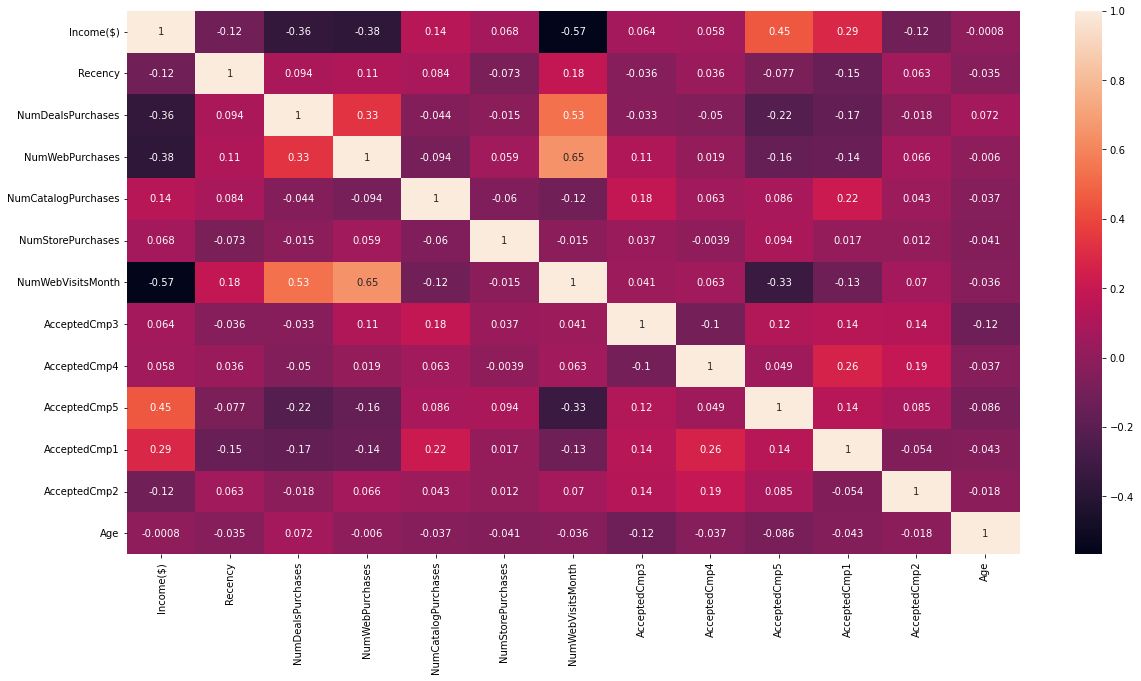

In [178]:
plt.figure(figsize = (20,10))
sns.heatmap(spend_more_onproducts_Num_vars_.corr(), annot = True)
plt.show();

**7. What kind of customers made more Website visits?**

**Inference**
    
1. Customers who max utilizes website visits still prefer store purchases over web purchases.

2. Most customers are graduated, married, have no children or teenagers, zero responsive to previous campaign, never complain, and are citizens of Serbia.

4. They have a higher earning capacity (left skewed) indicating the possible outliers in the lower range of income variable.

5. Products like food, drink, and gold are left skewed.

6. Most catalog purchases occur with the 5th campaign as the highest and they rarely complaint and having an average age of 54 years.

7. The use of catalog purchases is high with an increase in wine and meat purchases.

8. Fish, meat, fruit, and wine products have a significant impact in this category.

In [179]:
df.head(3)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,65,Retired,251,11


<AxesSubplot:>

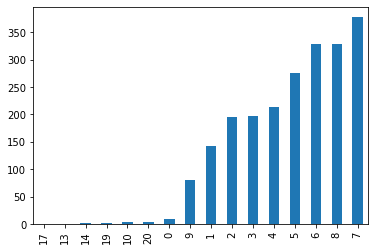

In [180]:
df['NumWebVisitsMonth'].value_counts().sort_values().plot(kind = 'bar')

In [181]:
df['NumWebVisitsMonth'].median()

6.0

In [182]:
df_more_website_visit = df[df['NumWebVisitsMonth']<=9]
df_more_website_visit

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,65,Retired,251,11
3,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,56,Working,11,4
4,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,34,Working,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,47,Working,689,20
2236,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,46,Working,55,5
2237,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,47,Working,309,14
2238,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,45,Working,1383,20


In [183]:
df_more_website_visit_cat = df_more_website_visit[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Response', 'Complain', 
                        'Country', 'Retired']]
df_more_website_visit_num = df_more_website_visit[[ 'Income($)', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Age']]


In [184]:
df_more_website_visit_num[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']].sum().sort_values(ascending = False)

NumStorePurchases      12531
NumWebVisitsMonth      11323
NumWebPurchases         8838
NumCatalogPurchases     5765
NumDealsPurchases       4973
dtype: int64

In [185]:
df_more_website_visit_num[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_index(ascending = False)

MntWines            659075
MntSweetProducts     58344
MntMeatProducts     361369
MntGoldProds         94829
MntFruits            56743
MntFishProducts      81065
dtype: int64

In [186]:
for column in df_more_website_visit_cat.columns:
    Value_counts = df_more_website_visit_cat[column].value_counts()
    print('The name of the column is: ', column)
    print('The nunique features in ' + column + ' is: ', df_more_website_visit_cat[column].nunique())
    print(Value_counts)
    print('*'*35)

The name of the column is:  Education
The nunique features in Education is:  5
Graduation    1082
PhD            465
Master         357
2n Cycle       192
Basic           54
Name: Education, dtype: int64
***********************************
The name of the column is:  Marital_Status
The nunique features in Marital_Status is:  6
Married        836
Together       556
Single         458
Divorced       223
Widow           73
YOLO/Absurd      4
Name: Marital_Status, dtype: int64
***********************************
The name of the column is:  Kidhome
The nunique features in Kidhome is:  3
0    1245
1     860
2      45
Name: Kidhome, dtype: int64
***********************************
The name of the column is:  Teenhome
The nunique features in Teenhome is:  3
0    1111
1     988
2      51
Name: Teenhome, dtype: int64
***********************************
The name of the column is:  Response
The nunique features in Response is:  2
0    1826
1     324
Name: Response, dtype: int64
*******************

In [187]:
for column in df_more_website_visit_num.columns:
    sum_value = df_more_website_visit_num[column].sum()
    max_value = df_more_website_visit_num[column].max()
    mean_value = df_more_website_visit_num[column].mean()
    median_value = df_more_website_visit_num[column].median()
    min_value = df_more_website_visit_num[column].min()
    print('The name of the column is: ', column)
    print('*'*35)
    print('The sum value of ' + column + ' is: ',sum_value)
    print('The max. value of ' + column + ' is: ',max_value)
    print('The mean value of ' + column + ' is: ',mean_value)
    print('The median value of ' + column + ' is: ',median_value)
    print('The min. value of ' + column + ' is: ',min_value)
    print('*'*100)
    print('*'*100)

The name of the column is:  Income($)
***********************************
The sum value of Income($) is:  112245060.0
The max. value of Income($) is:  162397.0
The mean value of Income($) is:  52207.0
The median value of Income($) is:  51533.0
The min. value of Income($) is:  2447.0
****************************************************************************************************
****************************************************************************************************
The name of the column is:  Recency
***********************************
The sum value of Recency is:  105555
The max. value of Recency is:  99
The mean value of Recency is:  49.0953488372093
The median value of Recency is:  49.0
The min. value of Recency is:  0
****************************************************************************************************
****************************************************************************************************
The name of the column is:  MntWines
*************

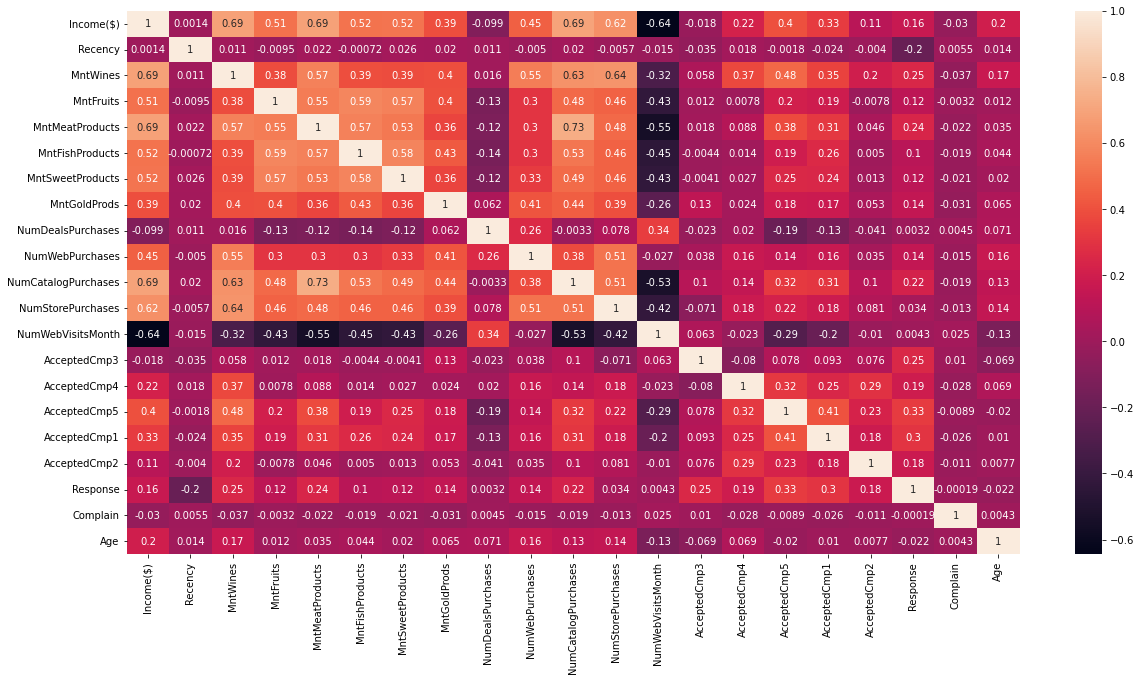

In [188]:
plt.figure(figsize = (20,10))
sns.heatmap(df_more_website_visit_num.corr(), annot = True)
plt.show();


**8. Is there any relationship between sales of Wine and Meat products?**

In [189]:
df.head(3)

,Education,Marital_Status,Income($),Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Retired,total_spends,tot_means_of_Purchase
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,Working,1190,15
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,Retired,577,18
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,65,Retired,251,11


<AxesSubplot:>

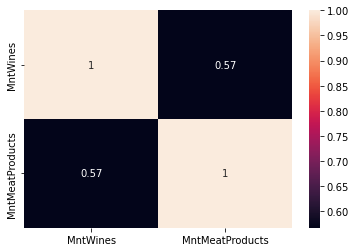

In [190]:
sns.heatmap(df[['MntWines', 'MntMeatProducts']].corr(), annot = True)

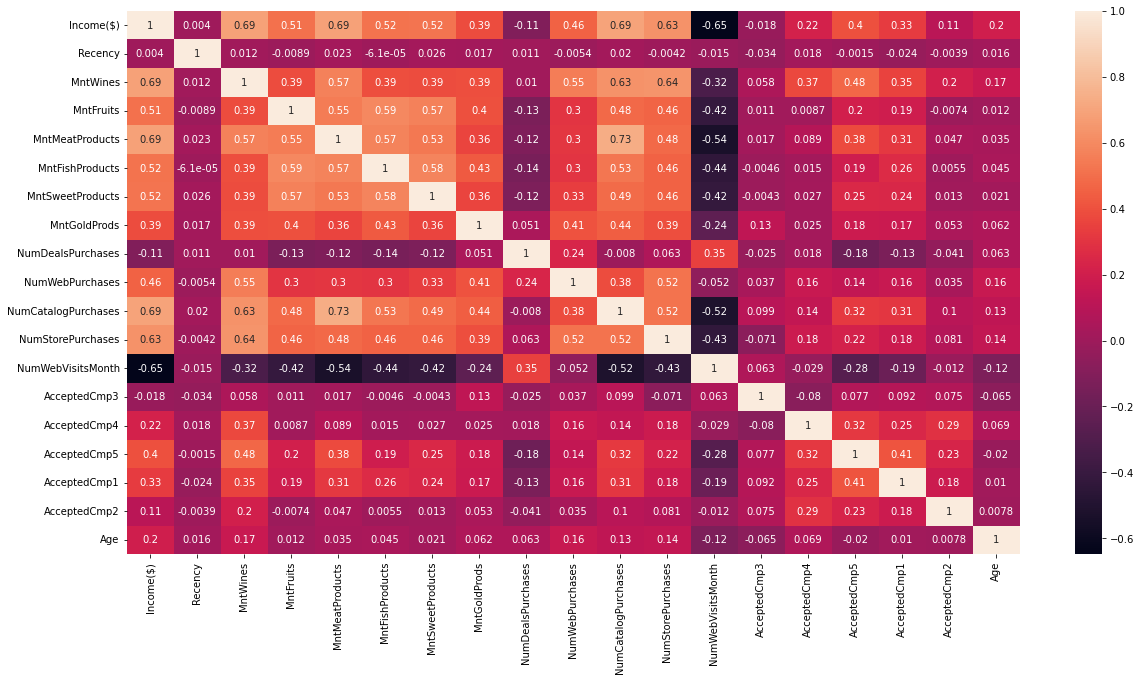

In [191]:
plt.figure(figsize = (20,10))
sns.heatmap(df[['Income($)', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Age']].corr(), annot = True)
plt.show();

**9. Did certain customers prefer Web Purchase over Store Purchases? If yes, how were their profiles different?**

**Inference**

No, The spread of customers prefer more Store Purchases over Web Purchase.

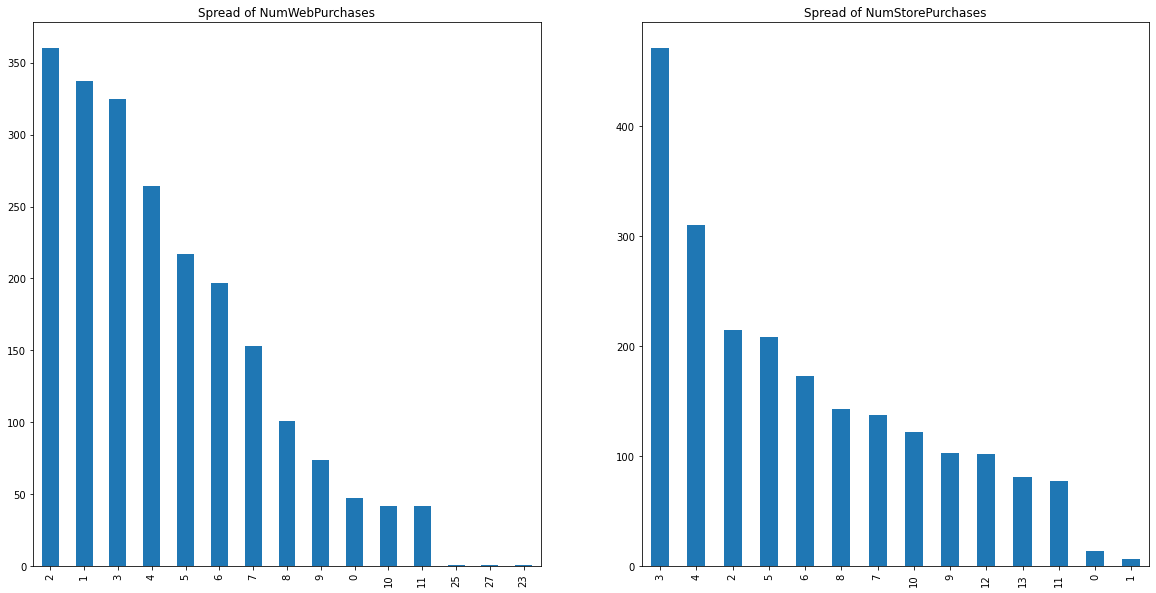

In [192]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
df['NumWebPurchases'].value_counts().plot(kind = 'bar')
plt.title('Spread of NumWebPurchases');

plt.subplot(1,2,2)
df['NumStorePurchases'].value_counts().plot(kind = 'bar')
plt.title('Spread of NumStorePurchases');

<AxesSubplot:>

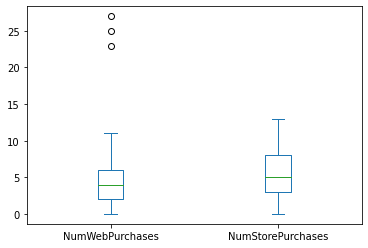

In [193]:
df[['NumWebPurchases','NumStorePurchases']].plot(kind = 'box')

In [194]:
df[['NumWebPurchases','NumStorePurchases']].mean()

NumWebPurchases      4.096670
NumStorePurchases    5.800648
dtype: float64

In [195]:
df[['NumWebPurchases','NumStorePurchases']].sum()

NumWebPurchases       8857
NumStorePurchases    12541
dtype: int64

**10. Is customer complaints an area of concern that should be closely looked at? Show appropriate metrics to support your response.**

In [ ]:
df[df['Complain'] == 1].shape # (20, 28)
df.shape # (2139, 28)

print('The amount of complains received is ', round((20/2139)*100,2))
print('Since the complain if less than 1 percent we can avoid it.')

## 6. Business Objectives and its Approach <a class="anchor" id="chapter6"></a>

**Business Objectives**

•  The Client's leadership team is mulling different strategies which will boost its
future sales

•  They need assistance in performing some quantitative analysis and use the generated insights as a guide in deciding on the appropriate strategy

•  Using the available information what analysis would you perform that can help the client ?

**How to decide what Approach to take?**

•  A good starting point is to list what all strategic actions can the client take to boost its sales/ profit

•  Secondly, rule out the possibilities which cannot be answered by the provided data (as the client is looking for a Quantitative Analysis and its outcomes/insights to guide any decision making)"

•  For the areas where any analysis could be performed,think of the"
1. Right questions to be asked or Hypothesis to be made, which the data can help answer"
2. Appropriate metrics/ summaries to be created and looked at  

**Business Objective**

To analyze and address the operational inefficiencies in the client's supply chain management system in order to optimize processes, reduce costs, and improve overall efficiency.

**High- Level Approach**

By conducting exploratory data analysis (EDA), variate analysis, and correlation analysis, we aim to address specific business questions and define clear objectives for the data analysis project.

**Approach to Project:**

**Identify the Demographic Factors:** We will **focus on customers** who have completed their Graduation, are married, do not have children or teenagers, hold Serbian citizenship, and are currently employed, as they tend to spend more.

**Analyze Spending Habits:** We will study the purchase channel and transaction of our target customers to understand how much and how often they spend on our products.

**Campaign Acceptance Analysis:** We will assess the **responses received** for the fifth campaign and determine the group with the highest number of responses. We will also look into the channels through which they primarily received campaign information.

**Education Level Analysis:** By categorizing customers **based on their educational qualifications**, such as PhD, Graduates, and Masters, we will identify the highest spenders and understand the relationship between education level and spending.

**Analysis of Unique Spenders:** We will examine the **spending habits of customers** who exhibit YOLO (You Only Live Once) or absurd behavior. This will help us understand their motivations and preferences that lead to higher spending.

**Geographic Spending Analysis:** We will analyze customer **data from different countries** like the United States (US), Canada (CA), and Germany (GER) to determine the countries with the highest spending. This will help us understand regional variations in spending habits.

In [48]:
df.groupby('Country').sum()

,Income($),Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,total_spends
Country,,,,,,,,,,,,,,,,,,,,,,,,
AUS,7548857.0,72,75,6534,42424,3680,22204,5534,4105,7023,327,591,395,820,759,9,6,12,7,0,22,0,8077,84970
CA,14019295.0,109,146,12278,83893,7678,45855,9963,7592,12096,633,1137,724,1546,1387,17,24,21,18,6,38,2,14442,167077
GER,6142327.0,44,52,5767,36776,2980,20272,4601,2801,5768,241,464,326,700,596,10,11,8,7,2,17,1,6281,73198
IND,7086741.0,76,73,7236,35889,3588,23344,4662,3092,5932,364,578,358,775,808,13,10,6,7,2,13,0,7458,76507
SA,17636076.0,163,158,16465,105017,8873,57959,13613,8920,14879,805,1374,908,1970,1758,21,20,21,20,4,52,3,17869,209261
SP,54258048.0,449,535,52396,323544,26964,171786,38312,29005,44687,2373,4234,2727,6080,5603,80,85,86,74,15,170,14,57008,634298
US,5694366.0,43,55,5403,32214,3034,20185,4411,2863,4839,285,479,329,650,598,8,6,5,7,0,13,0,5862,67546


# Thank You